In [1]:
# Importing all required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score


In [2]:
# Load the breast_cancer_dataset
df = pd.read_csv("/kaggle/input/breastcancer/Breast_cancer.csv")

In [3]:
# Column names of the dataset
column_names = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell Size', 'Uniformity_of_Cell_Shape',
                'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
                'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = column_names

#print the df
print("Original data set",df)

Original data set      Sample_code_number  Clump_Thickness  Uniformity_of_Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
694              776715                3                        1   
695              841769                2                        1   
696              888820                5                       10   
697              897471                4                        8   
698              897471                4                        8   

     Uniformity_of_Cell_Shape  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                           1                  1                        

**Preprocessing Steps**

In [4]:
# Changing values of target function from [2,4] to [0,1]
df['Class'] = np.where(df['Class'] == 2, 0, 1)

In [5]:
# Dropping 'Sample code number' column which is not required for classification
df.drop('Sample_code_number', axis=1, inplace=True)

In [6]:
# Replace missing values (denoted by '?') with NaN
df.replace('?', np.nan, inplace=True)

In [7]:
# Dropping the rows with missing values
df.dropna(inplace=True)

In [8]:
# Converting columns to numeric data type
df = df.astype({'Bare_Nuclei': 'int64', 'Class': 'int64'})

In [9]:
# Updated df is shown as output
print("Updated data set without sample_code_number",df)

Updated data set without sample_code_number      Clump_Thickness  Uniformity_of_Cell Size  Uniformity_of_Cell_Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Ba

In [10]:
# Split the dataset into features and target
X = df.iloc[:, :-1]  # loading Features into x
y = df.iloc[:, -1]  # Target into y

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train data using Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Train data using Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Train data using Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Train data using Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [16]:
# Predicting on basis of test data
y_pred_logistic_reg = logistic_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [17]:
# Calculating accuracy
accuracy_logistic_reg = accuracy_score(y_test, y_pred_logistic_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [18]:
# Calculating confusion matrix
confusion_matrix_logistic_reg = confusion_matrix(y_test, y_pred_logistic_reg)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

In [19]:
# Calculating recall
recall_logistic_reg = recall_score(y_test, y_pred_logistic_reg)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
recall_svm = recall_score(y_test, y_pred_svm)

In [20]:
# Calculating precision
precision_logistic_reg = precision_score(y_test, y_pred_logistic_reg)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
precision_svm = precision_score(y_test, y_pred_svm)

In [21]:
# Calculating F1 score
f1_score_logistic_reg = f1_score(y_test, y_pred_logistic_reg)
f1_score_decision_tree = f1_score(y_test, y_pred_decision_tree)
f1_score_random_forest = f1_score(y_test, y_pred_random_forest)
f1_score_svm = f1_score(y_test, y_pred_svm)

In [22]:
#output of accuracy of each model
print('Accuracy for testdata using logistic regression : ' , accuracy_logistic_reg)
print('Accuracy for testdata using decision tree : ' , accuracy_decision_tree)
print('Accuracy for testdata using random forest : ' , accuracy_random_forest)
print('Accuracy for testdata using svm : ' , accuracy_svm)

Accuracy for testdata using logistic regression :  0.9562043795620438
Accuracy for testdata using decision tree :  0.9416058394160584
Accuracy for testdata using random forest :  0.948905109489051
Accuracy for testdata using svm :  0.948905109489051


In [23]:
#output of Precision of each model
print('Precision for testdata using logistic regression : ' , precision_logistic_reg)
print('Precision for testdata using decision tree : ' , precision_decision_tree)
print('Precision for testdata using random forest : ' , precision_random_forest)
print('Precision for testdata using svm : ' , precision_svm)

Precision for testdata using logistic regression :  0.9814814814814815
Precision for testdata using decision tree :  0.9629629629629629
Precision for testdata using random forest :  0.9811320754716981
Precision for testdata using svm :  0.9636363636363636


In [24]:
#output of F1_score of each model
print('Recall for testdata using logistic regression : ' , recall_logistic_reg)
print('Recall for testdata using decision tree : ' , recall_decision_tree)
print('Recall for testdata using random forest : ' , recall_random_forest)
print('Recall for testdata using svm : ' , recall_svm)

Recall for testdata using logistic regression :  0.9137931034482759
Recall for testdata using decision tree :  0.896551724137931
Recall for testdata using random forest :  0.896551724137931
Recall for testdata using svm :  0.9137931034482759


In [25]:
#output of F1_score of each model
print('F1_score for testdata using logistic regression : ' , f1_score_logistic_reg)
print('F1_score for testdata using decision tree : ' , f1_score_decision_tree)
print('F1_score for testdata using random forest : ' , f1_score_random_forest)
print('F1_score for testdata using svm : ' , f1_score_svm)

F1_score for testdata using logistic regression :  0.9464285714285714
F1_score for testdata using decision tree :  0.9285714285714286
F1_score for testdata using random forest :  0.9369369369369369
F1_score for testdata using svm :  0.9380530973451328


In [26]:
#output of confusion_matrix of each model
print('confusion_matrix for testdata using logistic regression : \n' , confusion_matrix_logistic_reg)
print('confusion_matrix for testdata using decision tree : \n' , confusion_matrix_decision_tree)
print('confusion_matrix for testdata using random forest : \n' , confusion_matrix_random_forest)
print('confusion_matrix for testdata using svm : \n' , confusion_matrix_svm)

confusion_matrix for testdata using logistic regression : 
 [[78  1]
 [ 5 53]]
confusion_matrix for testdata using decision tree : 
 [[77  2]
 [ 6 52]]
confusion_matrix for testdata using random forest : 
 [[78  1]
 [ 6 52]]
confusion_matrix for testdata using svm : 
 [[77  2]
 [ 5 53]]


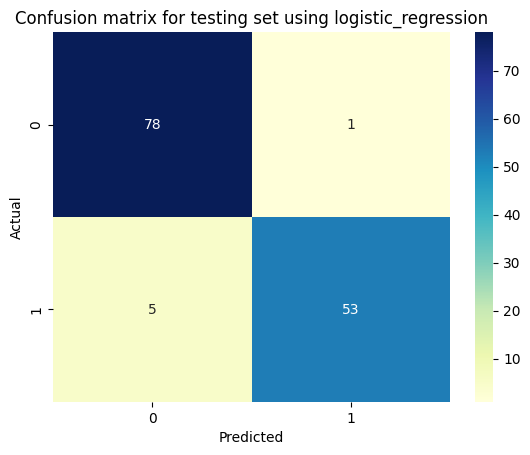

In [27]:
#plotting confusion matrix using logistic_regression
sns.heatmap(confusion_matrix(y_test, y_pred_logistic_reg), annot=True, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for testing set using logistic_regression')
plt.show()

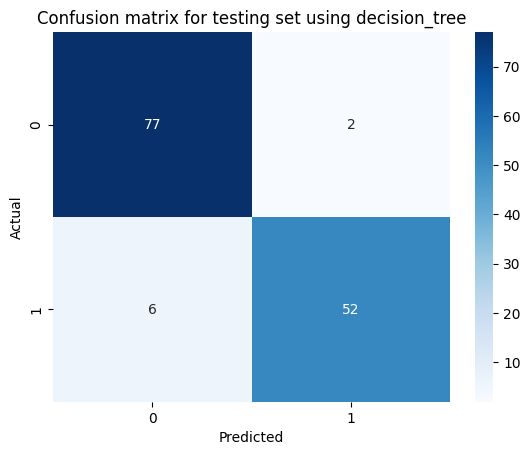

In [28]:
#plotting confusion matrix using decision_tree
sns.heatmap(confusion_matrix(y_test, y_pred_decision_tree), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for testing set using decision_tree')
plt.show()

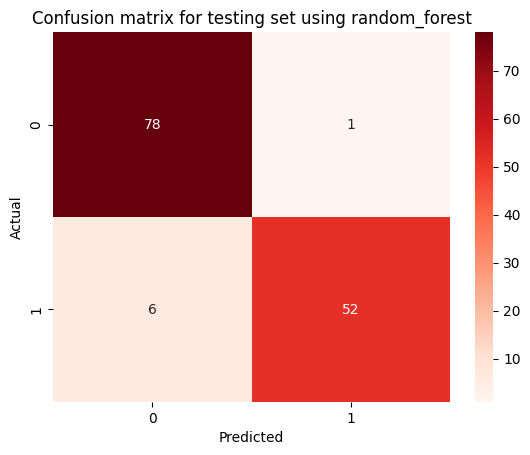

In [29]:
#plotting confusion matrix using random_forest
sns.heatmap(confusion_matrix(y_test, y_pred_random_forest), annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for testing set using random_forest')
plt.show()

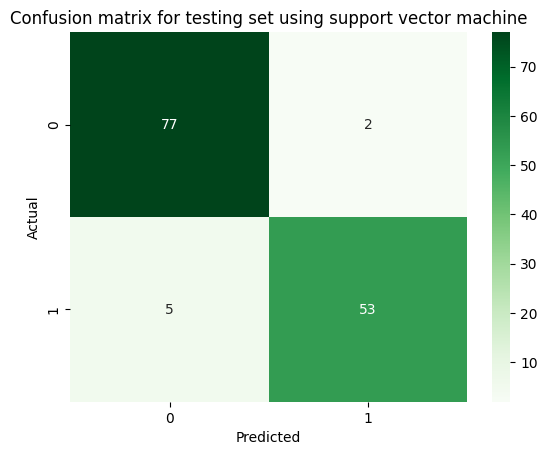

In [30]:
#plotting confusion matrix using support vector machine
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for testing set using support vector machine')
plt.show()